#### Name: Godfrey Jeremiah

#### Student ID: 23310758

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from scipy import stats
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn import set_config
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, auc
import joblib

### EDA - Exploratory Data Analysis

In [162]:
# Load dataset
df = pd.read_csv('./insurance.csv')
print('(number of examples, number of attributes): ', df.shape)

(number of examples, number of attributes):  (1338, 7)


In [163]:
df

age  gender     bmi  children smoker     region  insurance_cost
0      18    male  33.770         1     no  southeast      1725.55230
1      18    male  34.100         0     no  southeast      1137.01100
2      18  female  26.315         0     no  northeast      2198.18985
3      18  female  38.665         2     no  northeast      3393.35635
4      18  female  35.625         0     no  northeast      2211.13075
...   ...     ...     ...       ...    ...        ...             ...
1333   64  female  31.825         2     no  northeast     16069.08475
1334   64  female  26.885         0    yes  northwest     29330.98315
1335   64    male  26.410         0     no  northeast     14394.55790
1336   64    male  36.960         2    yes  southeast     49577.66240
1337   64    male  23.760         0    yes  southeast     26926.51440

[1338 rows x 7 columns]

In [164]:
df['gender'].value_counts()

male      676
female    662
Name: gender, dtype: int64

In [165]:
df.isna().sum()

age               0
gender            0
bmi               0
children          0
smoker            0
region            0
insurance_cost    0
dtype: int64

There are no missing values. Let's check the boxplots of the numerical columns for outliers.

In [166]:
df.loc[:,'age':'insurance_cost'].describe()

age          bmi     children  insurance_cost
count  1338.000000  1338.000000  1338.000000     1338.000000
mean     39.207025    30.663397     1.094918    13270.422265
std      14.049960     6.098187     1.205493    12110.011237
min      18.000000    15.960000     0.000000     1121.873900
25%      27.000000    26.296250     0.000000     4740.287150
50%      39.000000    30.400000     1.000000     9382.033000
75%      51.000000    34.693750     2.000000    16639.912515
max      64.000000    53.130000     5.000000    63770.428010

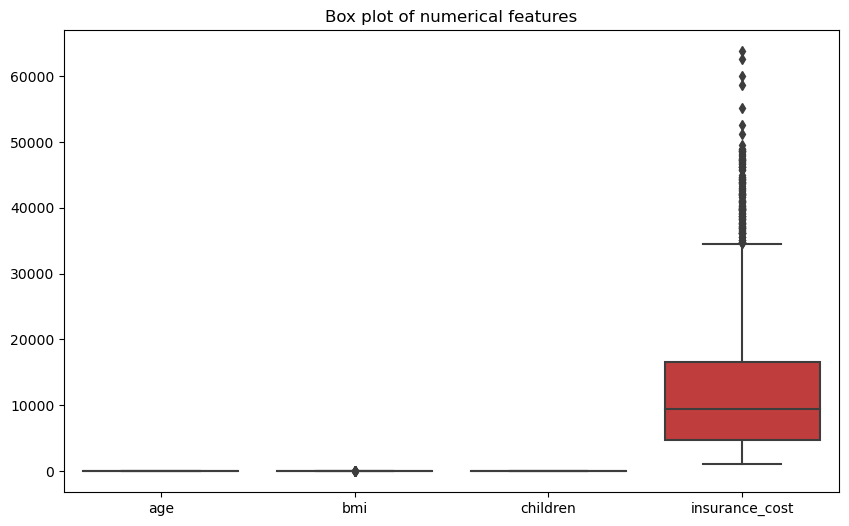

In [167]:
# Check for outliers using box plots
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['age', 'bmi', 'children', 'insurance_cost']])
plt.title("Box plot of numerical features")
plt.show()

All attributes, except children and insurance_cost_binary have outliers. 

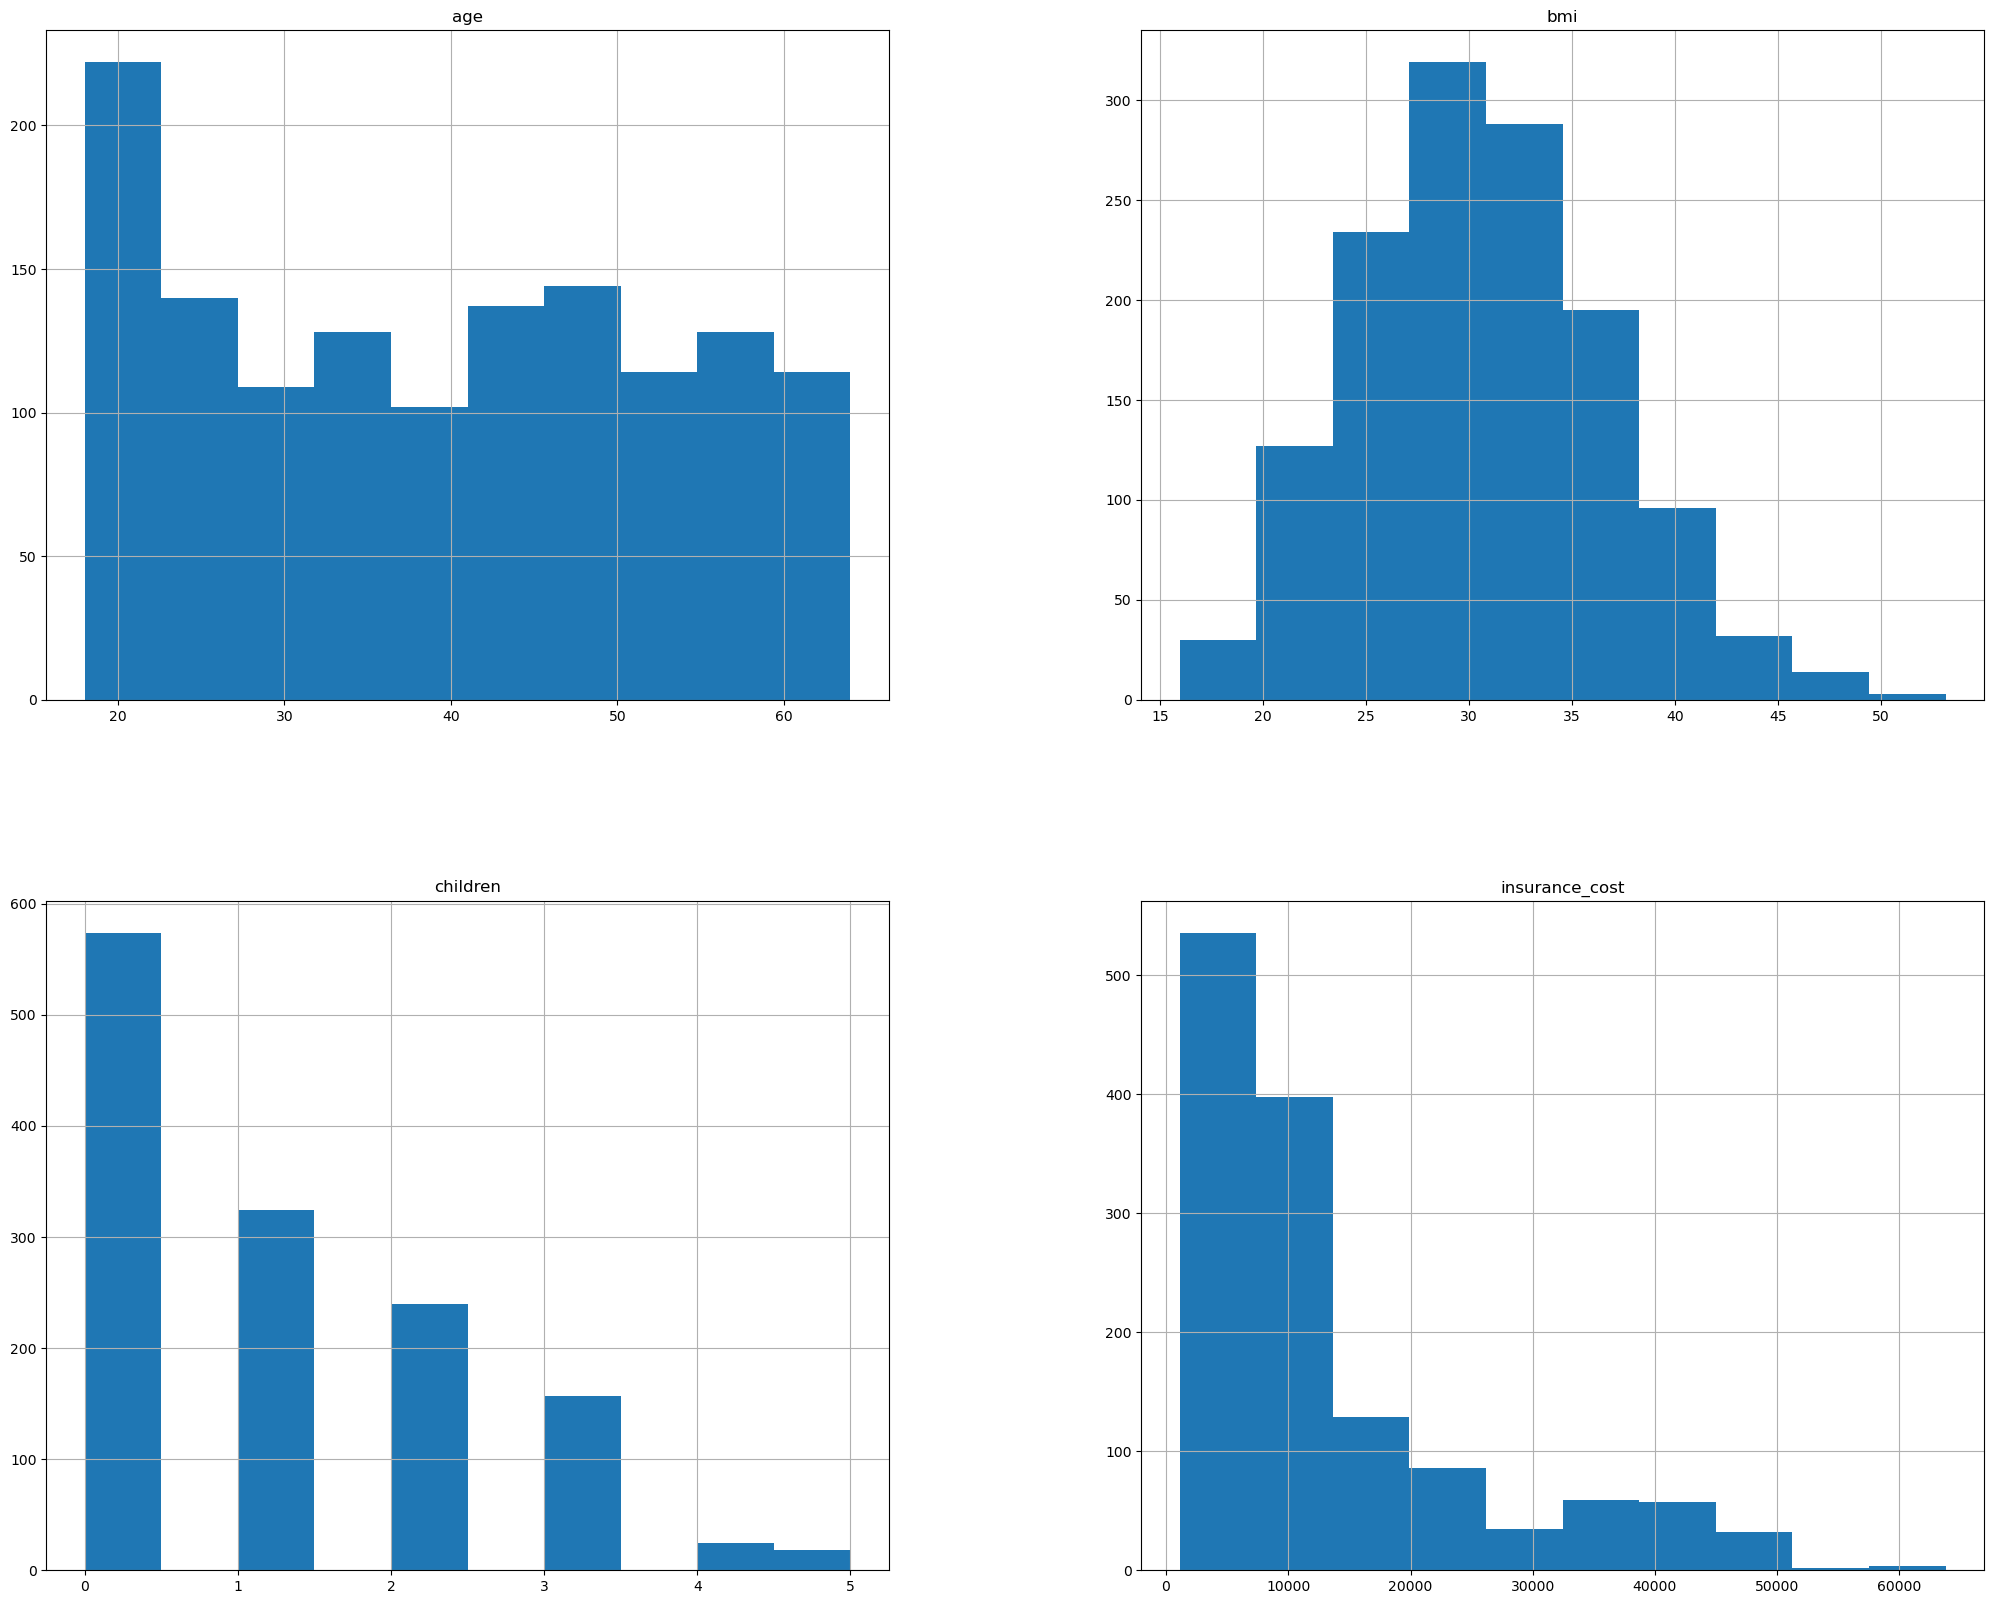

In [168]:
df.hist(bins=10, figsize=(25, 20));

In [169]:
# Calculate Z-score for numerical features
z_scores = np.abs(stats.zscore(df[['age', 'bmi', 'children', 'insurance_cost']]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)

#### Prepare the data by treating the outliers and on-outliers data

In [170]:
# Replace outliers with median values
for i, j in zip(*outlier_indices):
    df.iloc[i, j] = np.nan  # Mark outliers as NaN

# Replace NaN with median, considering only numerical columns
median_values = df.median(numeric_only=True)
df.fillna(median_values, inplace=True)


#### Calculate the median insurance cost

In [171]:
# Calculate the median insurance cost
median_insurance_cost = df['insurance_cost'].median()

# Create a new column 'insurance_cost_binary' based on the condition
df['insurance_cost_binary'] = (df['insurance_cost'] > median_insurance_cost).astype(int)

# Drop the original 'insurance_cost' column if needed
# df.drop(columns=['insurance_cost'], inplace=True)

# Optionally, if you want to keep the original column:
# df['insurance_cost'] = df['insurance_cost_binary']

# Display the modified DataFrame
print(df.head())

   age  gender     bmi  children smoker     region  insurance_cost  \
0   18    male  33.770       1.0     no  southeast      1725.55230   
1   18    male  34.100       0.0     no  southeast      1137.01100   
2   18  female  26.315       0.0     no  northeast      2198.18985   
3   18  female  38.665       2.0     no  northeast      3393.35635   
4   18  female  35.625       0.0     no  northeast      2211.13075   

   insurance_cost_binary  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  


In [172]:
print(df.tail())

      age  gender     bmi  children smoker     region  insurance_cost  \
1333   64  female  31.825       2.0     no  northeast     16069.08475   
1334   64  female  26.885       0.0    yes  northwest     29330.98315   
1335   64    male  26.410       0.0     no  northeast     14394.55790   
1336   64    male  36.960       2.0    yes  southeast     49577.66240   
1337   64    male  23.760       0.0    yes  southeast     26926.51440   

      insurance_cost_binary  
1333                      1  
1334                      1  
1335                      1  
1336                      1  
1337                      1  


### Tasks 1: Classification

Open a new Jupyter notebook and name it etivity3_classification.ipynb. In this notebook, first of all, replace the column `insurance_cost` with a binary column `insurance_cost_binary`, where `insurance_cost_binary` is 0 if the corresponding `insurance_cost` is less than or equal to the median insurance cost and 1 otherwise. Then train three classification pipelines with SVM, Random Forest and a third classifier of your choice as the final estimator, respectively, to train a model that predicts the value of `insurance_cost_binary`. 

Requirements:

For each classifier, include data preparation and dimensionality reduction steps in the main pipeline.
You can choose any classifier as the third one. Some options are MLPClassifier, Naive Bayes, and kNN, but you are not limited to them.
For the dimensionality reduction step use PCA, RFE and a third dimensionality reduction (incl. feature selection) technique in at least one pipeline.
Use grid search for hyperparameter tuning and replicate the process in the example notebook Tutorial 3-1 - Binary Classification.ipynb to evaluate and compare the models you have trained and pick the best one.
Summarise your experience in a markdown cell (max 150 words in a markdown cell).

### Solution

#### A. Split the data

In [173]:
# Split the data into features and target
X = df.drop(columns=['insurance_cost_binary'])
y = df['insurance_cost_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

#### B. Define preprocessing steps for num and cat variables

Build the preprocessing pipeline by using Pipeline and ColumnTransformer after using StandardScaler on numeric features and OneHotEncoder on category features as follows

In [174]:
# Define preprocessing steps for numerical and categorical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

#### C. Define pipelines for each classifier

The use of this pipeline ensures that preprocessing is applied separately to each training, validation, and test dataset, preventing data leakage.

In [175]:
# Define pipelines for each classifier
pipelines = {
    'svm': Pipeline([
        ('preprocessor', preprocessor),
        ('svm', SVC())
    ]),
    'random_forest': Pipeline([
        ('preprocessor', preprocessor),
        ('random_forest', RandomForestClassifier())
    ]),
    'logistic_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('logistic_regression', LogisticRegression())
    ])
}

Let's visualise the main pipeline.

In [176]:
set_config(display="diagram")
pipelines

{'svm': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('scaler',
                                                                    StandardScaler()),
                                                                   ('pca',
                                                                    PCA())]),
                                                   Index(['age', 'bmi', 'children', 'insurance_cost'], dtype='object')),
                                                  ('cat',
                                                   Pipeline(steps=[('onehot',
                                                                    OneHotEncoder())]),
                                                   Index(['gender', 'smoker', 'region'], dtype='object'))])),
                 ('svm', SVC())]),
 'random_forest': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transf

Now, let's train the model by exploring various combinations of values of the parameters

#### D. Define parameter grids for hyperparameter tuning

In [177]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    'svm': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf']
    },
    'random_forest': {
        'random_forest__n_estimators': [50, 100, 200],
        'random_forest__max_depth': [None, 10, 20]
    },
    'logistic_regression': {
        'logistic_regression__C': [0.1, 1, 10],
        'logistic_regression__solver': ['liblinear', 'lbfgs']
    }
}

#### E. Train and tune each classifier using grid search

In [178]:
# Train and tune each classifier using grid search
best_models = {}
for classifier in pipelines:
    print(f"Training and tuning {classifier}...")
    grid_search = GridSearchCV(pipelines[classifier], param_grid=param_grids[classifier], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[classifier] = grid_search.best_estimator_
    print(f"Best parameters for {classifier}: {grid_search.best_params_}")
    print(f"Best accuracy score for {classifier}: {grid_search.best_score_}")
    print("")

Training and tuning svm...
Best parameters for svm: {'svm__C': 10, 'svm__kernel': 'linear'}
Best accuracy score for svm: 0.9934579439252337

Training and tuning random_forest...
Best parameters for random_forest: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 200}
Best accuracy score for random_forest: 0.9710280373831776

Training and tuning logistic_regression...
Best parameters for logistic_regression: {'logistic_regression__C': 10, 'logistic_regression__solver': 'liblinear'}
Best accuracy score for logistic_regression: 0.9915887850467289



#### F. Evaluate and compare the best performing models on the test set

In [179]:
# Evaluate and compare the best performing models on the test set
test_scores = {}
for classifier, model in best_models.items():
    y_pred = model.predict(X_test)
    test_scores[classifier] = accuracy_score(y_test, y_pred)

# Print the test scores
print("Test set scores:")
for classifier, score in test_scores.items():
    print(f"{classifier}: {score}")

Test set scores:
svm: 0.9850746268656716
random_forest: 0.9514925373134329
logistic_regression: 0.9813432835820896


##### Pick the best model based on test set performance

In [180]:
# Pick the best model based on test set performance
best_classifier = max(test_scores, key=test_scores.get)
print(f"\nBest performing classifier based on test set score: {best_classifier}")


Best performing classifier based on test set score: svm


#### Plots to Visualize results

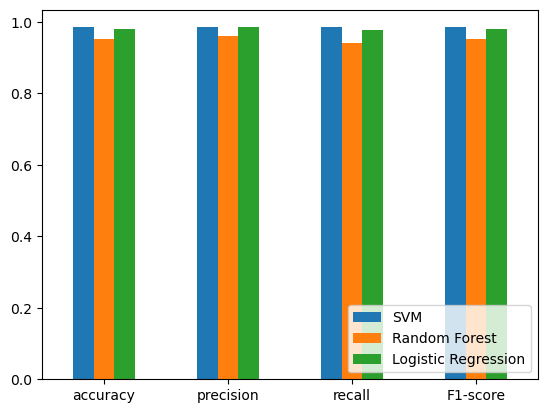

In [181]:
# Calculate additional metrics
SVM_accuracy = accuracy_score(y_test, best_models['svm'].predict(X_test))
SVM_precision = precision_score(y_test, best_models['svm'].predict(X_test))
SVM_recall = recall_score(y_test, best_models['svm'].predict(X_test))
SVM_f1_score = f1_score(y_test, best_models['svm'].predict(X_test))

RF_accuracy = accuracy_score(y_test, best_models['random_forest'].predict(X_test))
RF_precision = precision_score(y_test, best_models['random_forest'].predict(X_test))
RF_recall = recall_score(y_test, best_models['random_forest'].predict(X_test))
RF_f1_score = f1_score(y_test, best_models['random_forest'].predict(X_test))

LR_accuracy = accuracy_score(y_test, best_models['logistic_regression'].predict(X_test))
LR_precision = precision_score(y_test, best_models['logistic_regression'].predict(X_test))
LR_recall = recall_score(y_test, best_models['logistic_regression'].predict(X_test))
LR_f1_score = f1_score(y_test, best_models['logistic_regression'].predict(X_test))

# Plot metrics
SVM_metrics = np.array([SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score])

RF_metrics = np.array([RF_accuracy, RF_precision, RF_recall, RF_f1_score])

LR_metrics = np.array([LR_accuracy, LR_precision, LR_recall, LR_f1_score])

index = ['accuracy', 'precision', 'recall', 'F1-score']
df_metrics = pd.DataFrame({'SVM': SVM_metrics, 'Random Forest': RF_metrics, 'Logistic Regression': LR_metrics}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

The bar plot comparing accuracy, precision, recall, and F1-score across SVM, Random Forest, and Logistic Regression classifiers reveals SVM's overall superiority in predictive performance, exhibiting higher scores across all metrics. Logistic Regression follows closely, while Random Forest lags slightly behind in accuracy and F1-score.

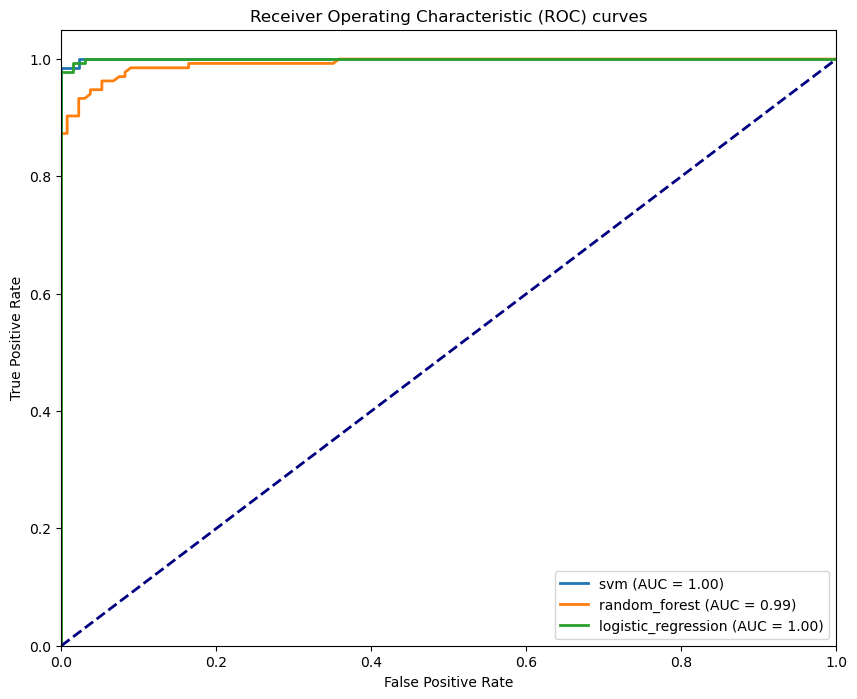

In [183]:
# Compute ROC curve and ROC area for each class
roc_auc = {}
plt.figure(figsize=(10, 8))
for classifier, model in best_models.items():
    if classifier == 'svm':
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc[classifier] = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{classifier} (AUC = {roc_auc[classifier]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves')
plt.legend(loc="lower right")
plt.show()

The Receiver Operating Characteristic (ROC) curves illustrate the performance of SVM, Random Forest, and Logistic Regression classifiers on insurance cost prediction. SVM exhibits the highest AUC, suggesting superior discrimination ability, followed by Logistic Regression, with Random Forest performing slightly lower but still demonstrating acceptable predictive performance.

C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Us

C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Us

C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\GJEF\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Us

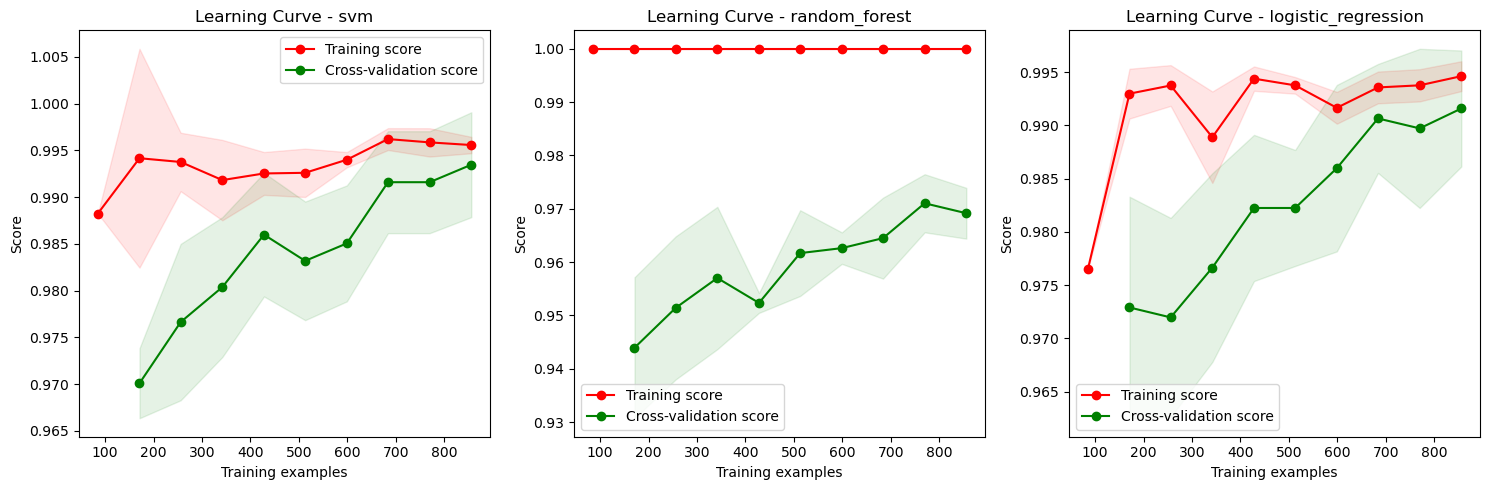

In [184]:
# 2. Learning Curve
plt.figure(figsize=(15, 5))
for i, (classifier, model) in enumerate(best_models.items(), 1):
    train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    
    plt.subplot(1, 3, i)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title(f'Learning Curve - {classifier}')
    plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Summary

Implementing and evaluating multiple classification pipelines for predicting insurance cost binary labels provided valuable insights into the effectiveness of different algorithms and preprocessing techniques.

Initially, preprocessing the dataset involved handling categorical variables through one-hot encoding and scaling numerical features. This ensured compatibility with classifiers such as SVM, Random Forest, and Logistic Regression.

Utilizing Grid Search for hyperparameter tuning optimized each model's performance, highlighting the importance of selecting appropriate parameters for achieving optimal results. However, computational resources and time required for Grid Search increased with the complexity of models and parameter grids.

Evaluation metrics such as accuracy scores, confusion matrices, and learning curves provided comprehensive insights into model performance. While SVM and Logistic Regression demonstrated competitive accuracy scores, Random Forest exhibited slightly superior performance on the test set. Additionally, learning curves illustrated the models' behavior with varying training data sizes, aiding in assessing their scalability and generalization capability.

Overall, the process emphasized the significance of data preprocessing, hyperparameter tuning, and thorough evaluation techniques in developing robust classification models. It showcased the trade-offs between algorithm complexity, computational resources, and model performance, guiding informed decisions in selecting the most suitable classifier for the task.

### Train the Final Model

In [187]:
# Choose the final model (for example, let's use SVM)
final_model = best_models['svm']  # Assuming SVM is the best performing model

# Train the final model on the entire dataset
final_model.fit(X, y)

# Define the file path to save the model
model_file_path = 'final_model.pkl'

# Save the final model to a file
joblib.dump(final_model, model_file_path)

print("Final model trained and saved successfully.")

Final model trained and saved successfully.
